In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

We can see that ATR consistently outperforms squared returns, doing best when there is ample amounts of training data. This might demonstrate ATR's ability to not overfit the model.

In [3]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10034
root = f"../output/runtest_{num}[final2]"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.sort_values(by="MAPE").groupby(["ETF","Metric"])["MAPE"].mean()
df_final.to_csv('../output/analysis/final_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../output/runtest_10034[final2]/date_config3/RNN/overall_results.csv'

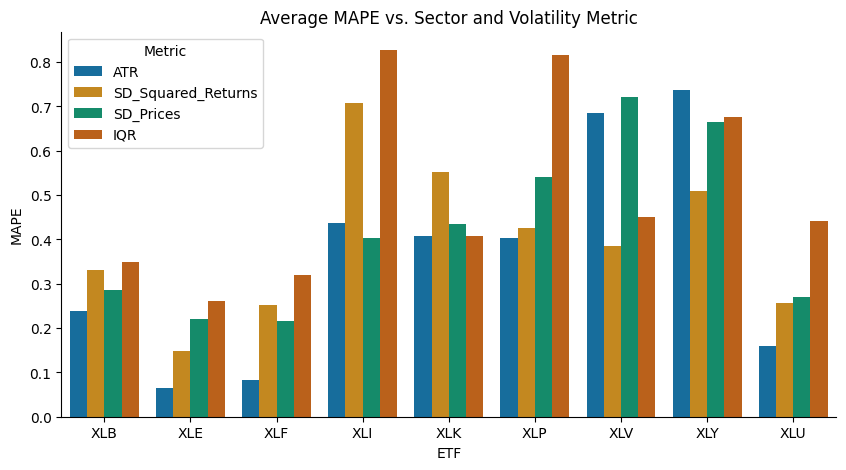

In [4]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(df_final,x="ETF",y="MAPE",hue="Metric",errorbar=None,palette='colorblind')
sns.despine()
plt.title("Average MAPE vs. Sector and Volatility Metric")
out_root = '../output/analysis/'
plt.savefig(os.path.join(out_root,"avg_errors"))


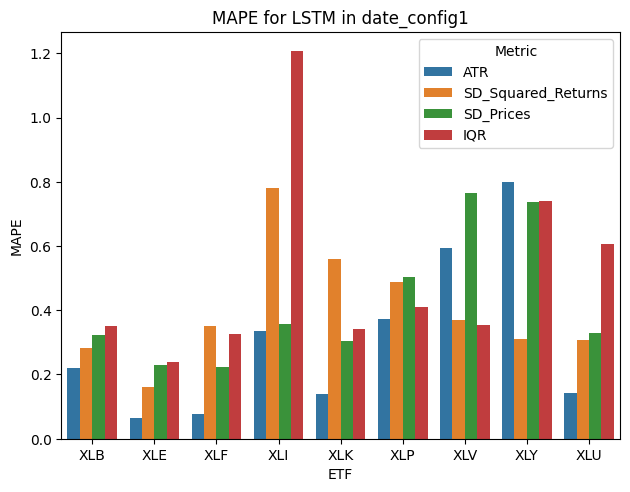

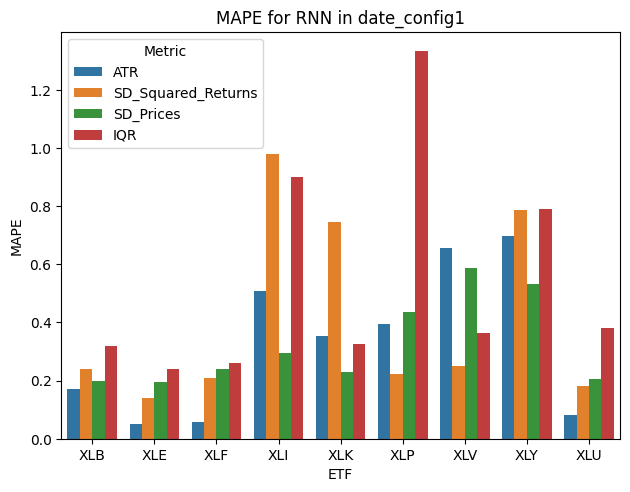

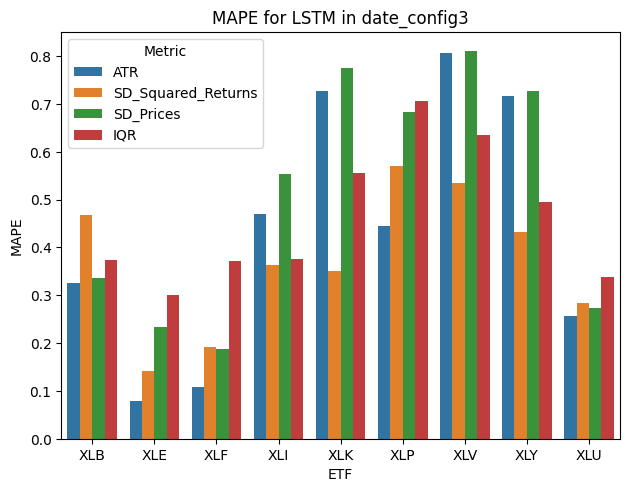

In [5]:
# show results
accuracy_metric = "MAPE"
for date,date_chunk in df_final.groupby("Date"): #returns (date_name,grouped section of df)
    for model,model_chunk in date_chunk.groupby("Model"):
        fig,ax = plt.subplots()
        sns.barplot(model_chunk,x="ETF",y=accuracy_metric,hue = "Metric", ax = ax)
        fig.tight_layout()
        ax.set_title(f"{accuracy_metric} for {model} in {date}")
        fig.savefig(fname=f"../output/analysis/{accuracy_metric}_{date}_{model}")

In [9]:
#Analyze final runs
df_final = pd.DataFrame()
num = 20019
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["Final_Value"].mean()

ETF  Metric            
XLB  ATR                    962.894991
     IQR                    972.566305
     SD_Prices             1000.827710
     SD_Squared_Returns     958.599236
XLE  ATR                   1052.538098
     IQR                    983.442748
     SD_Prices             1005.091723
     SD_Squared_Returns     900.036645
XLF  ATR                   1065.900870
     IQR                   1048.832910
     SD_Prices              923.060508
     SD_Squared_Returns     962.728809
XLI  ATR                   1065.993862
     IQR                   1035.003911
     SD_Prices             1018.851850
     SD_Squared_Returns    1052.834176
XLK  ATR                   1169.089137
     IQR                   1106.166492
     SD_Prices             1097.277859
     SD_Squared_Returns    1156.090180
XLP  ATR                    935.009655
     IQR                    998.280568
     SD_Prices             1005.402359
     SD_Squared_Returns     982.271597
XLU  ATR                    935.099133
 

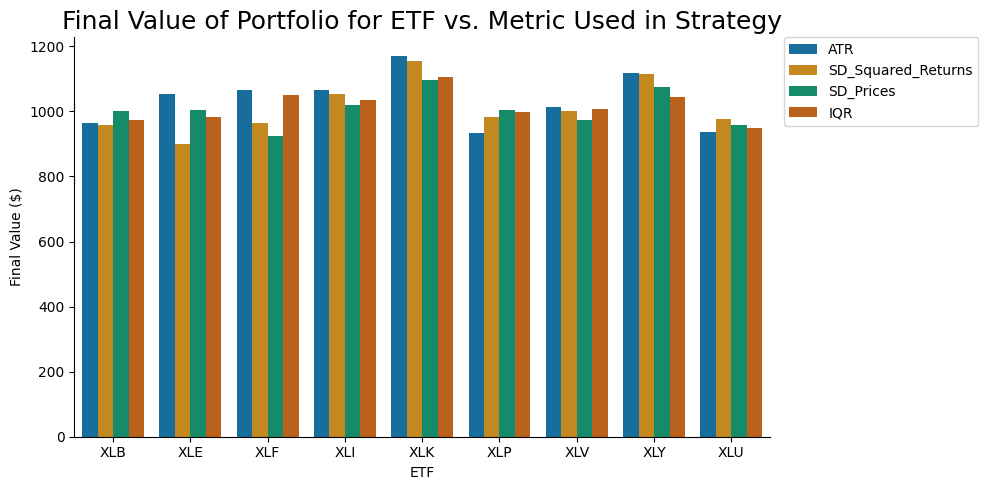

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    df_final,
    x="ETF",
    y="Final_Value",
    hue="Metric",
    errorbar=None,
    ax=ax,
    palette='colorblind'
)
sns.despine()
ax.set_ylabel("Final Value ($)")
ax.set_title("Final Value of Portfolio for ETF vs. Metric Used in Strategy",fontsize=18)
customize_ax(ax)

# place legend outside the plot:
ax.legend(
    loc='upper left',              # anchor the legend’s corner
    bbox_to_anchor=(1.02, 1.0),     # (x, y) in axes fraction coordinates
    borderaxespad=0
)

fig.tight_layout()  # make room for the legend
fig.savefig("../output/analysis/Final_Portfolio_Returns.png")


In [11]:
#take corr between accuracy and kurtosis
df_final = pd.read_csv('../output/analysis/final_df.csv')
etfs = ['XLB','XLE','XLF','XLI','XLK','XLP','XLV','XLY','XLU']
kurts = []
dates = {'date_config0':['2001-01-01', '2020-01-01', '2022-01-02', '2024-01-05'],'date_config1':['1990-01-05', '2010-01-05', '2023-01-05', '2024-01-05'],'date_config2':['2000-01-05', "2024-01-05", "2024-01-05", "2025-01-05"],'date_config3':['2005-01-05', '2010-01-05', '2020-01-05', '2024-01-05']}
for etf in etfs:
    for date,_ in df_final.groupby("Date"):
        df = get_cleaned_df(etf,dates[date][0],dates[date][1])
        kurt = ((df["Close"]/df["Close"].shift(1))**2).kurt()
        kurts.append(kurt)


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  1258  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  6038  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed

read  1258  lines of data for ticker:  XLU


In [13]:
len(kurts) #for each etf, have 4 date configs

36

In [45]:
df_final

,Unnamed: 0,ETF,Metric,Final_Value,Passive_Potential,Relative_MSE,MAPE,DM_stat,DM_p,Date,Model
0,0,XLB,ATR,999.218631,1026.704060,0.007887,0.253470,NaN,NaN,date_config1,LSTM
1,1,XLB,SD_Squared_Returns,963.784288,1026.704060,0.007000,0.559637,29.069408,8.749017e-186,date_config1,LSTM
2,2,XLB,SD_Prices,940.682907,1026.704060,0.005466,0.376079,-2.934657,3.339170e-03,date_config1,LSTM
3,3,XLB,IQR,999.911312,1026.704060,0.003273,0.568779,29.488678,4.021882e-191,date_config1,LSTM
4,4,XLE,ATR,938.127941,1010.148042,0.000666,0.066390,NaN,NaN,date_config1,LSTM
...,...,...,...,...,...,...,...,...,...,...,...
283,31,XLY,IQR,923.972012,994.575567,0.004227,0.808892,39.215389,0.000000e+00,date_config0,RNN
284,32,XLU,ATR,866.409105,972.176017,0.000868,0.114553,NaN,NaN,date_config0,RNN
285,33,XLU,SD_Squared_Returns,1063.502867,972.176017,0.001869,0.329975,26.308942,1.515235e-152,date_config0,RNN
286,34,XLU,SD_Prices,917.086036,972.176017,0.000848,0.260012,-9.016113,1.948812e-19,date_config0,RNN


In [46]:
atrs = df_final.loc[(df_final["Metric"]=="ATR") ].groupby(["ETF","Date"])["MAPE"].mean()
sds = df_final.loc[(df_final["Metric"]=="SD_Squared_Returns") ].groupby(["ETF","Date"])["MAPE"].mean()
diffs = atrs-sds

In [47]:
diffs

ETF  Date        
XLB  date_config0   -0.098021
     date_config1   -0.172381
     date_config2   -0.181441
     date_config3    0.076925
XLE  date_config0   -0.086044
     date_config1   -0.096036
     date_config2   -0.113641
     date_config3   -0.080921
XLF  date_config0   -0.085267
     date_config1   -0.149040
     date_config2   -0.529856
     date_config3   -0.098206
XLI  date_config0   -0.085821
     date_config1   -0.062876
     date_config2   -0.112608
     date_config3   -0.174982
XLK  date_config0    0.068609
     date_config1   -0.256414
     date_config2    0.121175
     date_config3    0.051990
XLP  date_config0   -0.023876
     date_config1   -0.875027
     date_config2   -0.119849
     date_config3    0.115035
XLU  date_config0   -0.160137
     date_config1   -0.223752
     date_config2   -0.213131
     date_config3   -0.294415
XLV  date_config0   -0.267399
     date_config1   -0.340158
     date_config2   -0.167680
     date_config3    0.043142
XLY  date_config0   -0

Text(0.05, 0.95, 'Slope = 0.003')

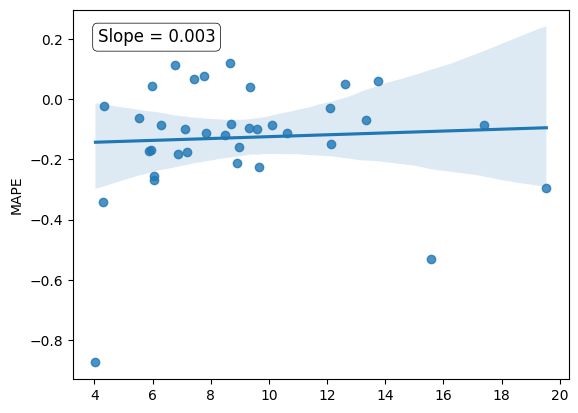

In [50]:
fig,ax = plt.subplots()
sns.regplot(x=kurts,y=diffs,ax=ax)
slope, intercept = np.polyfit(kurts, diffs, 1)
ax.text(
    0.05, 0.95,
    f"Slope = {slope:.3f}",
    transform=ax.transAxes,
    ha='left',
    va='top',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
)